# [02] 간단한 분류 알고리즘 훈련

## 기본적인 선형 분류기(퍼셉트론 알고리즘 -  아달린)

### [2.1] 인공 뉴런 : 초기 머신 러닝의 간단한 역사 

퍼섭트론(perceptron)과 이와 관련된 알고리즘을 자세히 설명하기 전에 초창기 머신 러닝을 간단히 둘러보면, AI를 설계하기 위해 생물학적 뇌가 동작하는 방식을 이해하려는 시도로, 1943년 위렌 맥컬론과 윌터 피츠는 처음으로 간소화된 뇌의 뉴런 개념을 발표했다. 뉴런들은 뇌의 신경 세포와 서로 연결되어 있는데 화학적-전기적 신호를 처리하고 전달하는 데 관여한다.

In [2]:
from IPython.display import Image
Image(url='https://git.io/JtIbf', width=500) 

맥컬론과 피츠는 신경 세포를 이진 출력을 내는 간단한 논리 회로로 표현했다. 수상돌기에 여러 신호가 도착하면 세포체에 합쳐지는데, 합쳐진 신호가 특정 임계 값을 넘으면 출력 신호가 생성되고 축삭 돌기를 이용하여 전달이된다.

몇 년 후에 프랑크 로젠블라트는 MCP 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표하였는데, 퍼셉트론 규칙에서 로젠블라트는 작동으로 최적의 가중치를 학습하는 알고리즘을 제안했습니다. 이 가중치는 뉴런의 출력 신호를 낼지 말지를 결정하기 위해 입력 특성에 곱하는 계수이다. 지도 학습과 분류 개념으로 말하면 이런 알고리즘을 사용하여 새로운 데이터 포인트가 한 클래스에 속하는지 아닌지를예측할 수 있다.

### [2.1.1] 인공 뉴런의 수학적 정의

좀 더 형식적으로 말하면 인공 뉴런(artificial neuron) 아이디어를 두 개의 클래스가 있는 이진 분류(binary classification)작업으로 볼 수 있다. 두 클래스는 간단하게 1(양성클래스)과 -1(음성클래스)로 나타낸다. 그다음 입력 값 *x*와 이에 상응하는 가중치 벡터 *w*의 선형 조합으로 결정함수를 정의한다. 최종 입력(net input)인 z는 점곱과 행렬 전치를 통해 표현된 식의 합이랑 같다.

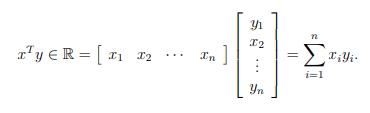

특성 샘플 $x^{(i)}$의 초종 입력이 사전에 정의된 임계 값보다 크면 클래스 1로 예측하고, 그렇지 않으면 클래스 -1로 예측한다. 퍼셉트론 알고리즘에서 결정함수는 단위 계단 함수(unit step function)를 변형한 것이다. 

머신 러닝 분야에서는 음수 임계 값 또는 가중치 *w* = -를 절편이라고 한다.

In [3]:
Image(url='https://git.io/JtIbL', width=500) 

### [2.1.2] 퍼셉트론 학습 규칙

퍼셉트론 모델 이면에 있는 전반적인 아이디어는 뇌의 뉴런 하나가 작동하는 방식을 흉내 내려는 환원주의(reductionism) 접근 방식을 사용한 것이다. 즉, 출력을 내거나 내지 않는 두 가지 경우만 있다. 따라서 로젠블라트의 초기 퍼셉트론 학습 규칙은 매우 간단하다. 퍼셉트론 알고리즘을 요약하면 다음 과정과 같다.

1. 가중치를 0 또는 랜덤한 작은 값으로 초기화한다.
2. 각 출력 샘플 $x^{(i)}$에서 다음 작업을 한다.
   - 출력값 $\hat{y}$을 계산한다.
   - 가중치를 업데이트한다.

여기서 출력 값은 앞서 정의한 단위 계단 함수로 예측한 클래스 레이블이다. 가중치 벡터 *w*에 있는 개별 가중치$w_j$가 동시에 업데이트되는 것을 다음과 같이 쓸 수 있다.

$w_j := w_j + \Delta w_j$

$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

$y^{(i)}=-1, \quad \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(-1-(-1))x_j^{(i)}=0$

$y^{(i)}=1, \quad \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(1-1))x_j^{(i)}=0$

$y^{(i)}=1, \quad \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(1-(-1))x_j^{(i)}=\eta(2)x_j^{(i)}$

$y^{(i)}=-1, \quad \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(-1-1))x_j^{(i)}=\eta(-2)x_j^{(i)}$

$\hat{y}^{(i)}=-1, \quad y^{(i)}=+1, \quad \eta=1$

$\Delta w_j=(1-(-1))0.5=(2)0.5=1$

$\Delta w_j=(1-(-1))2=(2)2=4$

$\eta$는 학습률(learning rate)이다.(일반적으로 0.0에서 1.0사이의 실수이다)

$y^{(i)}$는 *i*번째 훈련샘플의 **진짜 클래스 레이블**(true class label)이고, $\hat{y}^{(i)}$는 **예측 클래스 레이블**(predicted class label)이다. 가중치 벡터의 모든 가중치를 동시에 업데이트한다는 점이 중요하다. 즉, 모든 가중치가 각자의 업데이트 값 $\Delta{w}_j$에 의해 업데이트되기 전에 예측 레이블 $\hat{y}^{(i)}$를 다시 계산하지 않는다.

구체적으로 2차원 데이터셋에서는 다음과 같이 업데이트가 된다.

$\Delta{w}_0 = \eta(y^{(i)} - output^{(i)})$

$\Delta{w}_1 = \eta(y^{(i)} - output^{(i)})x_1^{(i)}$

$\Delta{w}_2 = \eta(y^{(i)} - output^{(i)})x_2^{(i)}$

퍼셉트론이 클래스 레입르을 정확히 예측한 두 경우는 가중치가 변경되지 않고 그대로 유지된다. 따라서 업데이트 값은 0이 된다.

잘못 예측했을 때는 가중치를 양성 또는 음성 타깃 클래스 방향으로 이동시킨다.

퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장된다.

두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(**에포크**(epoch))를 지정하고 분류 허용 오차를 지엉할 수 있다. 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않는다.

In [4]:
Image(url='https://git.io/JtIbq', width=600) 

In [5]:
Image(url='https://git.io/JtIbO', width=600) 

위의 그림은 퍼셉트론이 샘플$x$를 입력으로 받아 가중치 *w*를 연결하여 최종 입력을 계산하는 방법을 보여준다. 그다음 최종 입력은 임계 함수로 전달되어 샘플의 예측 클래스 레이블인 -1 또는 +1의 이진 출력을 만든다. 학습 단계에서 이 출력을 사용하여 예측 오차를 계산하고 가중치를 업데이트한다.

### [2.2] 파이썬으로 퍼셉트론 학습 알고리즘 구현

### [2.2.1] 객체 지향 퍼셉트론 API

객체 지향 방식을 사용하여 퍼셉트론 인터페이스를 가진 파이썬 클래스를 정의하겠다.

Perceptron 객체를 초기화한 후 fit 메서드로 학습하고, 별도의 predict 메서드로 예측을 만든다. 관례에 따라 객체의 초기화 과정에서 생성하지 않고 다른 메서드를 호출하여 만든 속성은 밑줄( _ )을 추가한다. 예를들어 self.w_와 같다.

#### perceptron  구현하기

In [6]:
import numpy as np

class Perceptron(object):
    """
    퍼셉트론 분류기
    
    매개변수
    -----------
    
    eta : float
        학습률(0.0 과 1.0 사이)
    n_iter : int
         훈련 데이터셋 반복 횟수
    random_state : int
         가중치 무작위 초기화를 위한 난수 생성기 시드
      
    속성
    ------------
    w_ : 1d-array
       학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
           (에포크(epoch):훈련데이터셋을 반복할 최대 횟수
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self , X, y):
        """
        훈련데이터 학습
        
        매개변수
        ----------------
        X : {array-like}, shape = [n_samples, n_features]
           n_samples개의 샘플과 n_feratures개의 특성으로 이루어진 훈련 데이터
        y : array-like , shape = [n_samples]
            타깃 값
            
        반환값
        -----------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0]  += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """입력 계산"""
        return np.dot(X,self.w_[1:]) + self. w_[0]
    
    def predict(self,X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0,1,-1)

In [7]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

### [2.2.2] 불꽃 데이터셋에서 퍼셉트론 훈련

#### 데이터 가져오기

In [8]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print("URL : ", s)
"""
위의 코딩이랑 같은 표현
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                   ,header=None, encoding='utf-8')
만약 인터넷 연결되어 있지 않거나 이따금  UCI서버에 접근을 할 수 없을 시 사용, 이때 로컬 디렉터리에서 불꽃 데이터를 로드하려고 하면
df = pd.read_csv('your/local/path/to/iris.data',
                   header=None, encoding='utf-8')
"""

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


"\n위의 코딩이랑 같은 표현\ndf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'\n                   ,header=None, encoding='utf-8')\n만약 인터넷 연결되어 있지 않거나 이따금  UCI서버에 접근을 할 수 없을 시 사용, 이때 로컬 디렉터리에서 불꽃 데이터를 로드하려고 하면\ndf = pd.read_csv('your/local/path/to/iris.data',\n                   header=None, encoding='utf-8')\n"

#### 데이터 확인

In [9]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### 2차원 산점도(scatter plot)로 시각화 하기

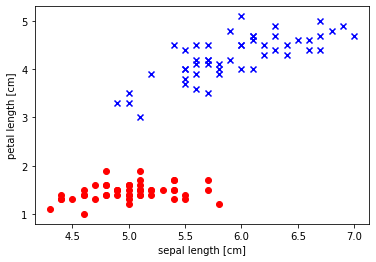

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#setosa와 versicolor를 선택합니다
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100,[0,2]].values

# 산점도를 그립니다
plt.scatter(X[:50,0], X[:50,1],
            color = 'red', marker='o', label= 'setosa')
plt.scatter(X[50:100,0],X[50:100,1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

#### 퍼셉트론 알고리즘을 훈련하기

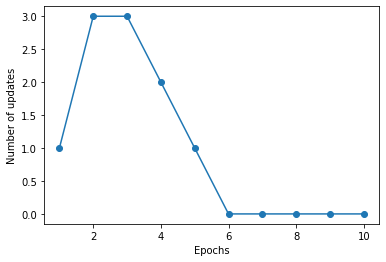

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### 2차원 데이터셋의 결정 경계를 시각화 해보기

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #마커와 컬러맵을 설정합니다.
    markers=('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','linegreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계를 그립니다
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #샘플의 산점도를 그립니다.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y ==cl ,0],
                    y= X[y ==cl,1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor= 'black')

#### 결정 겅계 그래프를 그리기

<ipython-input-12-b2cb64de1ab7>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x= X[y ==cl ,0],


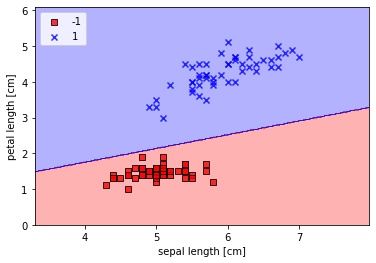

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### [2.3] 적응형 선형 뉴런과 학습의 수렴

적응형 선형 뉴련(AFAptive LInear NEuron, ADALINE)을 살펴보겠습니다. 아달린은 퍼셉트론의 향상된 버전으로 볼 수 있습니다 아달린은 연속 함수로 비용 함수를 정의하고 최소화하는 핵심 개념을 보여주기 때문에 아주 흥미롭습니다. 
아달린 규칙과 퍼셉트론의 가장 큰 차이점은 가중치를 업데이트하는 데 퍼셉트론처럼 단위 계단 함수 대신 선형 활성화 함수를 사용하는 것입니다. 아달린에서 선형 활성화 함수는 단순한 항등 함수입니다. 즉 다음과 같습니다.

$\phi(w^Tx)=w^Tx$

선형 활성화 함수가 가중치 학습에 사용되지만 최종 예측을 만드는 데 여천히 임계함수를 사용한다.
다음 그림은 퍼셉트론과 아달린 알고리즘의 주요 차이점 이다.

In [15]:
Image(url='https://git.io/JtIbn', width=600) 

**아달린 알고리즘은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트 한다다. 반대로 퍼셉트론은 진짜 클래스 레이블과 예츨 클래스 레이블을 비교한다..**

### [2.3.1] 경사 하강법으로 비용 함수 최소화

지도 학습 알고리즘의 핵심 구성 요소 중 하나는 학습 과정 동안 최적화하기 위해 정의한 **목적 함수**(object function)이다. 종종 최소화하려는 비용 함수가 목적 함수가 된다. 아달린은 계산된 출력과 진짜 클래스 레이블 사이의 **제곱 오차합**으로 가중치를 학습하기 위한 비용함수$J$를 정의한다

$J(w) = 1/2\sum_i(y^{(i)} - \phi(z^{(i)}))^2$

단위 계단 함수 대신 연속적인 선형 활성화 함수를 사용하는 장점은 비용 함수가 미분 가능해진다는 것이다. 이 비용함수의 또 다른 장점은 볼록 함수라는 것이다. 간단하지만 강력한 최적화 알고리즘인 **경사 하강법**(gradient descent)을 적용하여 불꽃 데이터 셋의 샘플을 분류하도록 비용 함수를 최소화하는 가중치를 찾을 수 있다.

그림은 경사 하강법 이면에 있는 핵심 아이디어를 지역 또는 전역 최솟값에 도달할 때까지 언덕을 내려오는 것으로 묘사하고 있다. 각 반복에서 경사의 반대 방향으로 진행한다. 진행 크기는 경사의 기울기와 학습률로 결정된다.

In [16]:
Image(url='https://git.io/JtIbc', width=500)

### [2.3.2] 파이썬으로 아달린 구현

퍼셉트론 규칙과 아달인이 매우 비슷하기 때문에 앞서 정의한 퍼셉트론 구현에서 fit 메서드를 바꾸어 경사 하강법으로 비용 함수가 최소화되도록 가중치를 업데이트한다.

In [18]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # (잠시 후에 보게 될) 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로 
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

퍼셉트론 처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고, 전체 훈련 데이터셋을 기반으로 그레이디언트를 계산한다. 절편(0번째 가중치)은 self.eta * errors.sum()이고 가중치 1에서 $m$까지는 self.eta * X.T.dot(errors)이다. 여기서 X.T.dot(errors)응 특성 행렬과 오차 벡터 간의 행렬-백터 곱셈이다.

이 코드의 activation 메서드는 단순한 항등 함수이기 때문에 아무런 영향을 미치지 않는다. 

입력 데이터의 특성에서 최종 입력, 활성화, 출력 순으로 진행된다.

실전에서는 최적으로 수렴하는 좋은 학습률 $\eta$를 찾기 위해 여러 번 실험을 해야 한다. 두 개의 학습률 $\eta$=0.과 $\eta$=0.0001을 선택해 보자. 에포크 횟수 대비 비용 함수의 값을 그래프로 나타내면 아달린 구현이 훈련 데이터에서 얼마나 잘 학습하는지 볼 수 있다.

두 학습률에서 에포크 횟수 대비 비용 그래프를 그려보자.

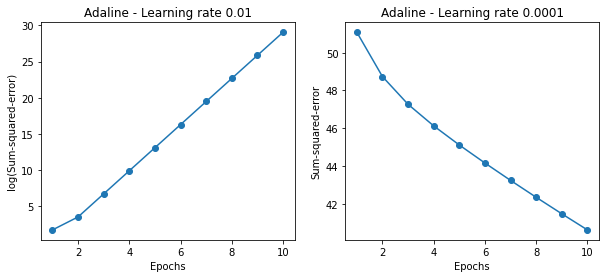

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

출력된 비용 함수 그래프에 볼 수 있듯이 두 개의 다른 문제가 발생한다. 왼쪽 그래프는 학습률이 너무 클 때 발생한다. 비용 함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커진다. 전역 최솟값을 지나쳤기 때문이다. 반면 오른쪽 그래프에서는 비용이 감소하지만 학습률 $\eta=0.0001$은 너무 작기 때문에 알고리즘이 전역 최솟갑에 수렴하려면 아주 많은 에포크가 필요하다.

### [2.3.3] 특성 스케일을 조정하여 경사 하강법 결과 향상

경사 하강법은 특성 스케일을 조정하여 혜택을 볼 수 있는 많은 알고리즘 중 하나이다. 이번에는 **표준화**(standardization)라고 하는 특성 스케일 방법을 사용하겠다. 이 정규화 과정은 데이터에 평균이0이고 단위 분산을 갖는 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀더 빠르게 수렴되도록 돕는다. 하지만 원본 데이터셋을 정규 분포로 만드는 것은 아니다. 표준화는 각 특성의 평균을 0에 맞추고 특성의 표준편차를1로 만든다. 예를들으 *j*번째 특성을 표준화 하려면 모든 샘플에서 평균 $\sigma_j$로 나누면 된다.

$x_j' = {(x_j-\mu_j)} / \sigma_j$

여기서 $x_j$는 *n*개의 모든 훈련 샘플에서 *j*번째 특성 값을 포함한 벡터이다. 표준화 기법을 데이터셋의 각 특성 *j*에 적용한다. 표준화가 경사 하강법 학습에 도움이 되는 이유 중 하나는 더 적은 단계를 거쳐 최적 혹은 좋은 솔루션을 찾기 때문이다.

#### 표준화하기 -> 넘파이 내장 함수 mean(평균) 과 std(표준편차)로 간단하게 처리 가능

In [20]:
#표준화(standardization)
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

#### 표준화한 후 다시 아달린 모델을 훈련하고 학습률 $\eta=0.01$에서 몇 번의 에포크만에 수렴하는지 확인

<ipython-input-12-b2cb64de1ab7>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x= X[y ==cl ,0],


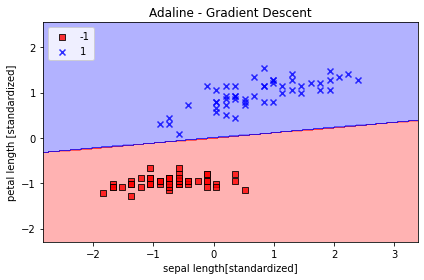

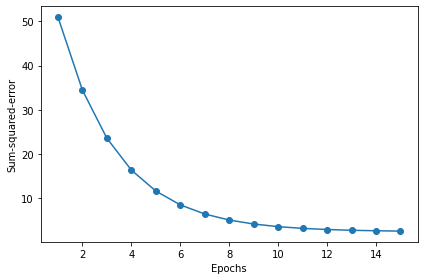

In [21]:
#아달린 모델을 훈련 후 몇번의 에포크만에 수렴하는지 확인
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.ylabel("petal length [standardized]")
plt.xlabel("sepal length[standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()

이 그래프레서 볼 수 있듯이 학습률 $\eta=0.01$을 사용하고 표준화된 특성에서 훈련하니 아달린 모델이 수렴했다. 모든 샘플이 완벽하게 분류되더라도 SSE가 0이 되지는 않는다.

### [2.3.4] 대규모 머신 러닝과 확률적 경사 하강법

앞서 배운 방법은 **배치 경사 하강법**이라고 부른다. 배치 경사 하강법은 전체 훈련 데이터셋에서 계산한 그레이디언트의 반대 방향으로 한 걸음씩 진행하여 비용 함수를 최소화하는 방법이다. 이번에 배울 방법은 **확률적 경사 하강법**(stochastic gradient descent)이며 배치 경사 하강법을 실행하면 계산 비용이 매우많이 들고 전역 최솟값으로 나아가는 단계마다 매번 전체 훈련 데이터셋을 다시 평가해야한다는 단점을 극복하기 위한 것이다.

$\Delta{w} = \eta\sum_i(y^{(i)}-\phi(z^{(i)}))x^{(i)}$

$\Delta{w} = \eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}$

첫 번째 수식은 모든 샘플 $x^{(i)}$에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 두 번째 수식처럼 각 훈련 샘플에 대해 조금씩 가중치를 업데이트한다.

확률적 경사 하강법을 경사 하강법의 근사로 생각할 수 있지만 가중치가 더 자주 업데이트되기 때문에 수렴 속도가 훨씬 빠르다. 그레이디언트가 하나의 훈련 샘플을 기반으로 계산되므로 오차의 궤적은 배치 경사 하강법보다 훨씬 어지럽다. 비선형 비용 함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있어 장점이 되기도 한다.

확률적 경사 하강법의 또 다른 장점은 **온라인 학습**(online learning)으로 사용할 수 있다는 것이다. 온라인 학습에서 모델은 새로운 훈련 데이터가 도착하는 대로 훈련된다. 많은 양의 훈련 데이터가 있을 때도 유용하다. 예를 들어 고객 데이터를 처리하는 웹 애플리케이션이다. 온라인 학습을 사용해서 시스템은 변화에 즉시 적용한다. 저장 공간에 제약이 있다면 모델을 업데이트한 후 훈련 데이터를 버릴 수 있다.

#### 확률적 경사 하강법을 이용하여 아달린을 구현하기

In [22]:
class AdalineSGD(object):
    """
    ADAptive LInear NEuron 분류기
    
    매개변수
    -----------
    
    eta : float
        학습률(0.0 과 1.0 사이)
    n_iter : int
         훈련 데이터셋 반복 횟수
    shuffle : bool (defaultL True)
    True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다.
    random_state : int
         가중치 무작위 초기화를 위한 난수 생성기 시드
      
    속성
    ------------
    w_ : 1d-array
       학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
           (에포크(epoch):훈련데이터셋을 반복할 최대 횟수
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self , X, y):
        """
        훈련데이터 학습
        
        매개변수
        ----------------
        X : {array-like}, shape = [n_samples, n_features]
           n_samples개의 샘플과 n_feratures개의 특성으로 이루어진 훈련 데이터
        y : array-like , shape = [n_samples]
            타깃 벡터
            
        반환값
        -----------------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다."""
        if not self.w_initialized:
            self.initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다."""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self,X):
        """최종입력 계산"""
        return np.dot(X,self.w_[1:]) + self. w_[0]
    
    def activation(self, X):
        """선형 활성화 계산"""
        return X
   
    def predict(self,X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)

fit 메서드 안에서 각 훈련 샘플에 대해 가중치를 업데이틀 할 것이다. 추가로 partial_fit 메서드도 구현하겠다. 이 메서드는 가중치를 다시 초기화하지 않아 온라인 학습에서 사용할 수 있다. 훈련 후에는 알고리즘이 수렴하는지 확인하려고 에포크마다 훈련 샘플의 평균 비용을 계산한다. 비용 함수를 최적화할 때 반복적인 순환이 일어나지 않도록 매 에포크가 일어나기 전에 훈련 샘플을 섞는 옵션을 추가한다. random_state 매개변수로는 재현 가능하도록 랜덤 시드를 지정할 수 있다.

AdalineSGD 분류기에서 사용하는 _shuffle 메서드는 다음과 같이 작동한다. np.random 모듈의 permutation 함수로 0에서 100까지 중복되지 않은 랜덤한 숫자 시퀸스(sequence)를 생성한다. 이 숫자 시퀸스를 특성 행렬과 클래스 레이블 벡터를 섞는 인덱스로 사용한다


그다음 fit 메서드로 AdalineSGD 분류기를 훈련하고, plot_decision_regions로는 훈련 결과를 그래프로 그린다.

<ipython-input-12-b2cb64de1ab7>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x= X[y ==cl ,0],


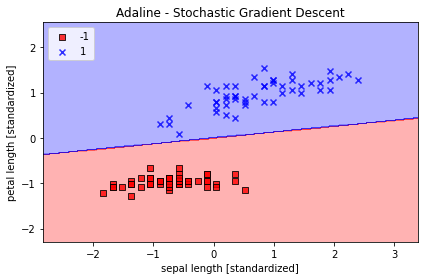

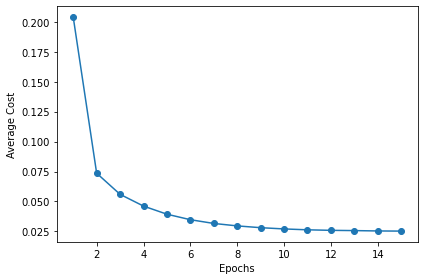

In [23]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

## ★Summary★

경사 하강법이랑 확률적 경사 하강법은 전체의 데이터를 통해 가중치를 업데이트 하는지 또는 한개씩을 가지고 가중치를 업데이트를 하는지에 따라 다르다. 둘다 장 단점이 있으며, 몇개를 가지고 에포크시 더 효율적인지에 대해서는 **미니 배치 경사 하강법**이 존재를 한다.

이번 장에서는 지도 학습의 기초적인 선형 분류기 개념을 배웠다.

퍼셉트론을 구현한 후 벡터화된 경사 하강법 방식으로 적응형 선형 뉴런을 어떻게 효율적으로 훈련하는지도 배웠다. 또 확률적 경사 하강법을 사용하여 온라인 학습으로 훈련하는 방버또한 배웠다.

퍼셉트론 >>>>> 결정함수를 통과한 $\hat{y}$값 사용해 오차계산 후 가중치 없데이트

아달린 >>>>> 결정함수 통과하기 전 가중치 update 활성함수를 통과한 후 오차 계산
          
          >>>>>>비용함수는 그레이디언트를 통해 가중치 값이 가장 낮아지는 값으로 이동하게하여 최적의 가중치를 찾아가도록 한다.
# ***결과적으로 퍼셉트론이랑 아딜린의 결과는 비슷한 형태를 보여주고 있다*** 
     